In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import numpy.random as rand
from PIL import Image

In [ ]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, transform=None, download=True)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, transform=None, download=True)

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [ ]:
import random
import numpy
import matplotlib.pyplot as plt

%matplotlib inline 
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


In [ ]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def prep_data(train, test):
  """ Divides train and test data into independent features and labels. """

  train_x = []
  train_y = []
  for i in range(len(trainset)):
    x = np.asarray(trainset[i][0])
    y = trainset[i][1]
    train_x.append(x)
    train_y.append(y)
  
  test_x = []
  test_y = []
  for j in range(len(testset)):
    x = np.asarray(testset[j][0])
    y = testset[j][1]
    test_x.append(x)
    test_y.append(y)
  
  return np.array(train_x), np.array(train_y), np.array(test_x), np.array(test_y)


train_x, train_y, test_x, test_y = prep_data(train=trainset, test=testset)

print(f"Number of training samples: {len(train_x)}")
print(f"Number of training labels: {len(train_y)}")
print(f"Number of testing samples: {len(test_x)}")
print(f"Number of testing labels: {len(test_y)}")

Number of training samples: 50000
Number of training labels: 50000
Number of testing samples: 10000
Number of testing labels: 10000


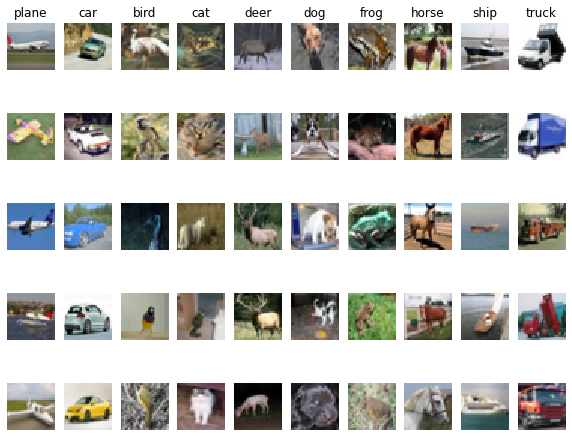

In [ ]:
rand.seed(1337)
for class_num, label in enumerate(classes):
  per_class = 5
  num_classes = len(classes)
  indices = np.flatnonzero(train_y == class_num)
  indices = rand.choice(indices, per_class, replace=False)
  for i, idx in enumerate(indices):
        plt_idx = i * num_classes + class_num + 1
        plt.subplot(per_class, num_classes, plt_idx)
        plt.imshow(train_x[idx])
        plt.axis('off')
        if i == 0:
            plt.title(label)
plt.show()
    


In [ ]:
# Subsample the data for more efficient code execution in this exercise
num_training = 5000
mask = list(range(num_training))
train_x = train_x[mask]
train_y = train_y[mask]

num_test = 500
mask = list(range(num_test))
test_x = test_x[mask]
test_y = test_y[mask]

# Reshape the image data into rows
train_x = np.reshape(train_x, (train_x.shape[0], -1))
test_x = np.reshape(test_x, (test_x.shape[0], -1))
print(train_x.shape, test_x.shape)

(5000, 3072) (500, 3072)


In [80]:
# Custom class designed by CS231n course staff for their K-Nearest Neighbors Classifier

class KNearestNeighbor(object):
    """ a kNN classifier with L2 distance """

    def __init__(self):
        pass

    def train(self, X, y):
        """
        Train the classifier. For k-nearest neighbors this is just
        memorizing the training data.

        Inputs:
        - X: A numpy array of shape (num_train, D) containing the training data
          consisting of num_train samples each of dimension D.
        - y: A numpy array of shape (N,) containing the training labels, where
             y[i] is the label for X[i].
        """
        self.X_train = X
        self.y_train = y

    def predict(self, X, k=1, num_loops=0):
        """
        Predict labels for test data using this classifier.

        Inputs:
        - X: A numpy array of shape (num_test, D) containing test data consisting
             of num_test samples each of dimension D.
        - k: The number of nearest neighbors that vote for the predicted labels.
        - num_loops: Determines which implementation to use to compute distances
          between training points and testing points.

        Returns:
        - y: A numpy array of shape (num_test,) containing predicted labels for the
          test data, where y[i] is the predicted label for the test point X[i].
        """
        if num_loops == 0:
            dists = self.compute_distances_no_loops(X)
        elif num_loops == 1:
            dists = self.compute_distances_one_loop(X)
        elif num_loops == 2:
            dists = self.compute_distances_two_loops(X)
        else:
            raise ValueError('Invalid value %d for num_loops' % num_loops)

        return self.predict_labels(dists, k=k)

    def compute_distances_two_loops(self, X):
        """
        Compute the distance between each test point in X and each training point
        in self.X_train using a nested loop over both the training data and the
        test data.

        Inputs:
        - X: A numpy array of shape (num_test, D) containing test data.

        Returns:
        - dists: A numpy array of shape (num_test, num_train) where dists[i, j]
          is the Euclidean distance between the ith test point and the jth training
          point.
        """
        num_test = X.shape[0]
        num_train = self.X_train.shape[0]
        dists = np.zeros((num_test, num_train))
        for i in range(num_test):
            for j in range(num_train):
                test = X[i]
                train = self.X_train[j]
                dists[i][j] = np.linalg.norm(test-train, 2)
        return dists

    def compute_distances_one_loop(self, X):
        """
        Compute the distance between each test point in X and each training point
        in self.X_train using a single loop over the test data.

        Input / Output: Same as compute_distances_two_loops
        """
        num_test = X.shape[0]
        num_train = self.X_train.shape[0]
        dists = np.zeros((num_test, num_train))
        for i in range(num_test):
            #######################################################################
            # TODO:                                                               #
            # Compute the l2 distance between the ith test point and all training #
            # points, and store the result in dists[i, :].                        #
            # Do not use np.linalg.norm().                                        #
            #######################################################################
            # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

            pass

            # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return dists

    def compute_distances_no_loops(self, X):
        """
        Compute the distance between each test point in X and each training point
        in self.X_train using no explicit loops.

        Input / Output: Same as compute_distances_two_loops
        """
        num_test = X.shape[0]
        num_train = self.X_train.shape[0]
        dists = np.zeros((num_test, num_train))
        #########################################################################
        # TODO:                                                                 #
        # Compute the l2 distance between all test points and all training      #
        # points without using any explicit loops, and store the result in      #
        # dists.                                                                #
        #                                                                       #
        # You should implement this function using only basic array operations; #
        # in particular you should not use functions from scipy,                #
        # nor use np.linalg.norm().                                             #
        #                                                                       #
        # HINT: Try to formulate the l2 distance using matrix multiplication    #
        #       and two broadcast sums.                                         #
        #########################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****


        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return dists

    def predict_labels(self, dists, k=1):
        """
        Given a matrix of distances between test points and training points,
        predict a label for each test point.

        Inputs:
        - dists: A numpy array of shape (num_test, num_train) where dists[i, j]
          gives the distance betwen the ith test point and the jth training point.

        Returns:
        - y: A numpy array of shape (num_test,) containing predicted labels for the
          test data, where y[i] is the predicted label for the test point X[i].
        """
        num_test = dists.shape[0]
        y_pred = np.zeros(num_test)
        for i in range(num_test):
            # A list of length k storing the labels of the k nearest neighbors to
            # the ith test point.
            closest_y = []
            all_distances = []
            for j in range(len(self.X_train)):
              pred = dists[i][j]
              all_distances = np.append(all_distances, pred)
            all_distances = np.argsort(all_distances)
            for n in range(k):
              neighbor = all_distances[n]
              closest_y = np.append(closest_y, neighbor)
            indices = np.array([], dtype=int)
            for elem in closest_y:
              index = int(elem)
              pred = int(train_y[index])
              indices = np.append(indices, pred)
            prediction = np.bincount(indices).argmax()
            y_pred[i] = prediction
        
            # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
            #########################################################################
            # TODO:                                                                 #
            # Now that you have found the labels of the k nearest neighbors, you    #
            # need to find the most common label in the list closest_y of labels.   #
            # Store this label in y_pred[i]. Break ties by choosing the smaller     #
            # label.                                                                #
            #########################################################################
            # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
            # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        return y_pred

In [81]:
classifier = KNearestNeighbor()
classifier.train(train_x, train_y)

In [82]:
dists = classifier.compute_distances_two_loops(np.array(test_x))
print(dists.shape)

(500, 5000)


In [83]:
print(dists)

[[ 7840.95976268  8651.93799099  7183.77442575 ...  8743.54567667
   9117.36025393  7149.99356643]
 [ 8439.56047434  7865.74421145  9388.09224497 ...  7071.50351764
   7529.63591417  8701.65392325]
 [ 8327.88088291  8742.82500111  9486.03578952 ...  8134.06681802
   8019.39810709  7930.95025832]
 ...
 [ 8521.73286368  8027.02373237  7776.20691597 ...  8152.3556105
   8740.84177868  7933.28261188]
 [ 7118.9791403   8228.13253418  6355.82040338 ...  8251.85548831
  10061.11753236  7600.8369276 ]
 [ 7426.22845057  7091.6009476   9286.5586737  ...  6795.51690455
   5591.90227025  8330.70615254]]


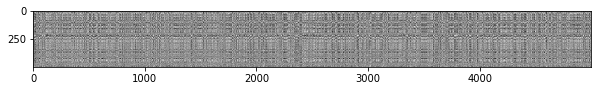

In [84]:
# We can visualize the distance matrix: each row is a single test example and
# its distances to training examples
plt.imshow(dists, interpolation='none')
plt.show()

Inline Question 1:

Notice the structured patterns in the distance matrix, where some rows or columns are visible brighter. (Note that with the default color scheme black indicates low distances while white indicates high distances.)
What in the data is the cause behind the distinctly bright rows?
What causes the columns?

Y𝑜𝑢𝑟𝐴𝑛𝑠𝑤𝑒𝑟:  The bright rows correspond to the test images that were least similar to all the classes in question. These can be thought of as the images whose probability distribution differed the most from every single training image. In more practical terms, these could be images that weren't part of any of the CIFAR-10 classes.

Similarly, the bright columns correspond to those images from the training set that were least similar to all of the testing data points.

In [87]:
# Now implement the function predict_labels and run the code below:
# We use k = 1 (which is Nearest Neighbor).
y_test_pred = classifier.predict_labels(dists, k=5)

# Compute and print the fraction of correctly predicted examples
num_correct = np.sum(y_test_pred == test_y)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

Got 105 / 500 correct => accuracy: 0.210000


**Inline Question 2**

We can also use other distance metrics such as L1 distance.
For pixel values $p_{ij}^{(k)}$ at location $(i,j)$ of some image $I_k$, 

the mean $\mu$ across all pixels over all images is $$\mu=\frac{1}{nhw}\sum_{k=1}^n\sum_{i=1}^{h}\sum_{j=1}^{w}p_{ij}^{(k)}$$
And the pixel-wise mean $\mu_{ij}$ across all images is 
$$\mu_{ij}=\frac{1}{n}\sum_{k=1}^np_{ij}^{(k)}.$$
The general standard deviation $\sigma$ and pixel-wise standard deviation $\sigma_{ij}$ is defined similarly.

Which of the following preprocessing steps will not change the performance of a Nearest Neighbor classifier that uses L1 distance? Select all that apply.
1. Subtracting the mean $\mu$ ($\tilde{p}_{ij}^{(k)}=p_{ij}^{(k)}-\mu$.)
2. Subtracting the per pixel mean $\mu_{ij}$  ($\tilde{p}_{ij}^{(k)}=p_{ij}^{(k)}-\mu_{ij}$.)
3. Subtracting the mean $\mu$ and dividing by the standard deviation $\sigma$.
4. Subtracting the pixel-wise mean $\mu_{ij}$ and dividing by the pixel-wise standard deviation $\sigma_{ij}$.
5. Rotating the coordinate axes of the data.

$\color{blue}{\textit Your Answer:}$



$\color{blue}{\textit Your Explanation:}$

[1 2 3 4 5 6 7 8 2 4 4 5 6 6 6 9]


In [41]:
train_y[781]

6

In [60]:
type(np.bincount(x).argmax())

numpy.int64